In [60]:
# univariate gaussian mixture model
import random
import matplotlib.pyplot as plt
sigma = []

k = 4
mu = [1,3,5,7]
for i in range(k):
    num = random.uniform(0,1)
    sigma.append(num)
    
lambda_n = [0.2, 0.3, 0.25, 0.25]


In [61]:
print(mu, 'MEAN')
print([a*b for a,b in zip(sigma,sigma)], 'VARIANCE')
print(lambda_n, 'MIXING PROBABILITY')

[1, 3, 5, 7] MEAN
[0.6031713276760318, 0.0693282993365393, 0.5917002967285601, 0.68279582795775] VARIANCE
[0.2, 0.3, 0.25, 0.25] MIXING PROBABILITY


In [62]:
def create_normal(x, mu, sigma):
    out = np.exp(-(x-mu)**2/(2*sigma**2))
    out = out/np.sqrt(2*np.pi*sigma*sigma)
    return out



In [63]:
def parzen_window_est(x_samples, h=1, center=[0], d = 1):
        # center  = [0]*d
        # print(center)
        n = x_samples.shape[0]
        t_sum = 0
        for items in x_samples:
            # print(items)
            t_sum+=create_normal((center-items)/h, 0, 1)


        t_sum/=n
        t_sum/=(h**d)
        print(t_sum.shape)
        return t_sum
            
def parzen_window_uniform_est(x_samples, h = 1, center=[0], d = 1):
    
    n = x_samples.shape[0]
    t_array = []
    t_sum = 0
    for ele in center:
        for items in x_samples:
            # print(items)
            if items - h/2 <= ele and items + h/2 > ele:
                t_sum+=1
        t_sum/=n
        t_array.append(t_sum)

    
    
    t_array = [x / h**d for x in t_array]
    t_array = np.array(t_array).reshape(-1,d)
    return t_array


            

In [64]:
# GMM model
import numpy as np
x = np.linspace(-3, 10, 1000)
inp_out = 0
for i in range(k):
    inp_out += lambda_n[i]*create_normal(x, mu[i], sigma[i])

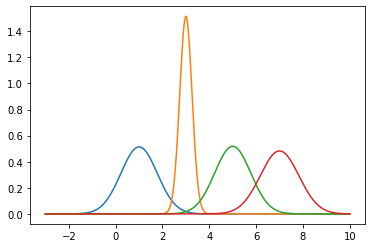

In [65]:
# individual components
for num in range(0,k):
    inp = create_normal(x, mu[num], sigma[num])
    plt.plot(x, inp)
plt.show()

In [66]:
x = x.reshape(-1, 1)

In [67]:
inp_out = inp_out.reshape(-1,1)

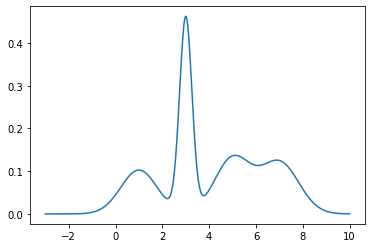

In [68]:
plt.plot(x,inp_out)
plt.show()

In [69]:
# sampling points 
num_samples = 1000
tp_points = []
d_points = []
for i,lambdas in enumerate(lambda_n):
    num_new = num_samples*lambdas
    sampled_points = np.random.normal(mu[i], sigma[i], num_samples)
    d_points.append(sampled_points)
    tp_points+=list(sampled_points)
    

In [70]:
inp_points = np.array(tp_points).reshape(-1,1)
center = np.array(x).reshape(-1,1)

In [71]:
print(center.shape)

(1000, 1)


(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)


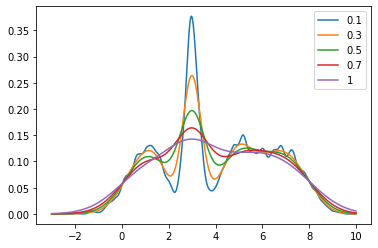

In [72]:
h_list = [0.1, 0.3, 0.5, 0.7, 1]
for items in h_list:
    x_out_new = parzen_window_est(inp_points, h=items, center = center)
    plt.plot(x, x_out_new)
plt.legend(['0.1', '0.3','0.5','0.7', '1'])
plt.show()


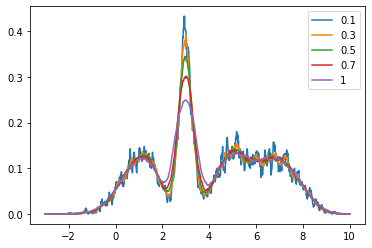

In [73]:
h_list = [0.1, 0.3, 0.5, 0.7, 1]
for items in h_list:
    x_out_new = parzen_window_uniform_est(inp_points, h=items, center = center)
    plt.plot(x, x_out_new)
plt.legend(['0.1', '0.3','0.5','0.7', '1'])
plt.show()


In [74]:
# K-means clustering distance metric for 1d 
def calc_distance(X1, X2):
    return abs(X1-X2)


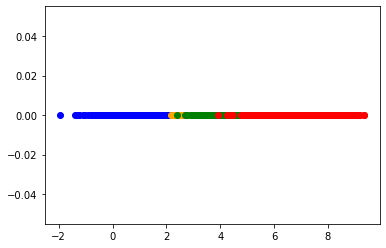

In [75]:
# sampled data points distribution
cdict = {0: 'blue', 1: 'orange', 2: 'green', 3:'red', 4:'violet'}
for i,items in enumerate(d_points):
    plt.scatter(items, [0]*len(items), c=cdict[i])
plt.show()

In [76]:
# decide on number of clusters and initial cluster means

num_Clusters = k
cent = random.sample(tp_points, num_Clusters)
# print(cent)
num_iter = 1000
cluster_assignment = [0]*len(tp_points)
for i in range(0,num_iter):
    new_mean = [0]*num_Clusters
    for j,points in enumerate(tp_points):
        dist = []
        for cent_points in cent:
            dist.append(calc_distance(points, cent_points))
        
        cluster_assignment[j] = dist.index(min(dist))
        
    for q in range(0,num_Clusters):
        t_num = 0
        for r,items in enumerate(cluster_assignment):
            if (items==q):
                new_mean[q]+=tp_points[r]
                t_num+=1
                
        new_mean[q]/=t_num
    
    cent = new_mean
            
    


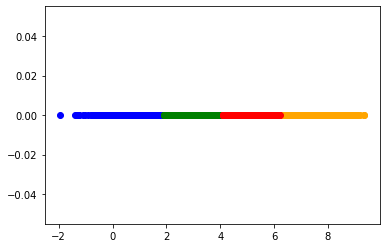

In [77]:
d_points_calc = []
for q in range(0, num_Clusters):
    d_single_cluster = []
    for j,items in enumerate(cluster_assignment):
        if items==q:
            d_single_cluster.append(tp_points[j])
    d_points_calc.append(d_single_cluster)

for i,items in enumerate(d_points_calc):
    plt.scatter(items, [0]*len(items), c=cdict[i])
plt.show()